# __Heart Disease Prediction – Part 2__

# __Clustering__

## __Importing the Necessary Libraries__

In [28]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

from sklearn.mixture import GaussianMixture
from sklearn import metrics # for calculating Silhouette score

import time


# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## __Using the stored df from part 1__

In [2]:
%store -r df_shuffle
df = df_shuffle
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
1,44,1,0,110,197,0,0,177,0,0.0,2,1,2,0
2,42,0,0,102,265,0,0,122,0,0.6,1,0,2,1
3,69,0,3,140,239,0,1,151,0,1.8,2,2,2,1
4,64,0,0,130,303,0,1,122,0,2.0,1,2,2,1


## __Understanding the Data__

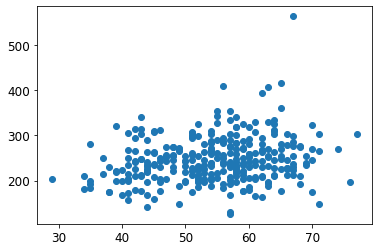

In [3]:
X = df[['age', 'chol']].to_numpy()
X_df = df[['age', 'chol']]
plt.scatter(X[:,0], X[:,1])

X is the sub data array of the orginal df, containing only the features `age` and `cholestrol` of eac patient.

## __Selectiong the Ideal Number of Clusters__

### __1. Elbow Method__

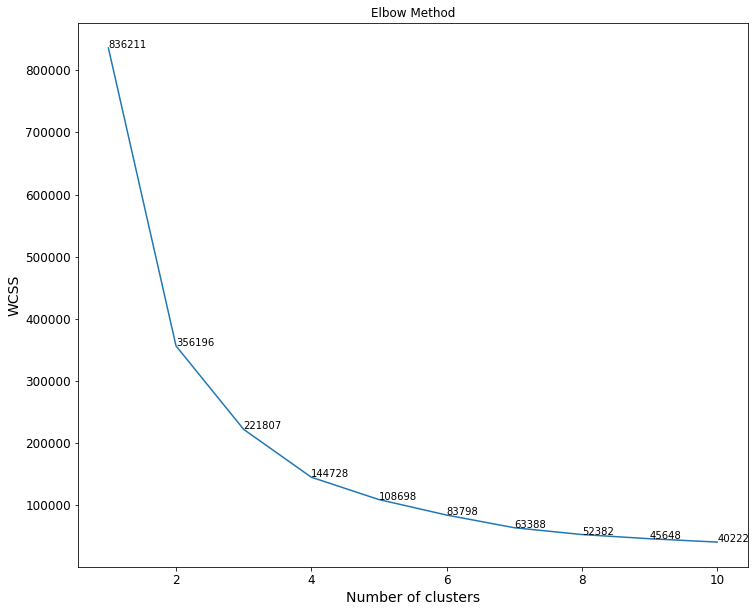

In [4]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12, 10))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
for i,j in zip(range(1, 11),wcss):
    inplot = plt.annotate(str(round(j))
                          ,xy=(i,j+1)
                          ,fontsize=10
                          ,color='black')
plt.show()

The inertia in the Elbow method stars decreading in a linear fashion at "number of clusters (K)" = 2, but seems like 3 or 4 as well. Hence, lets use the Silhouette Plot method to gain a final conclusion.

### __2. Silhouette Plots__

For n_clusters = 2 The average silhouette_score is : 0.5272399836976795
For n_clusters = 3 The average silhouette_score is : 0.46966086316922767
For n_clusters = 4 The average silhouette_score is : 0.47719595669932613
For n_clusters = 5 The average silhouette_score is : 0.43239184661671204
For n_clusters = 6 The average silhouette_score is : 0.4191178956659142
For n_clusters = 10 The average silhouette_score is : 0.3745332518267062


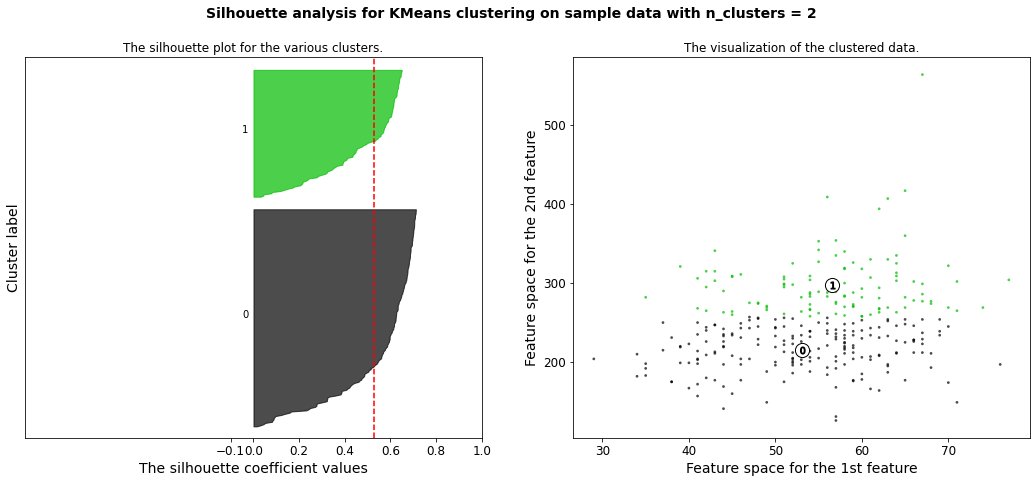

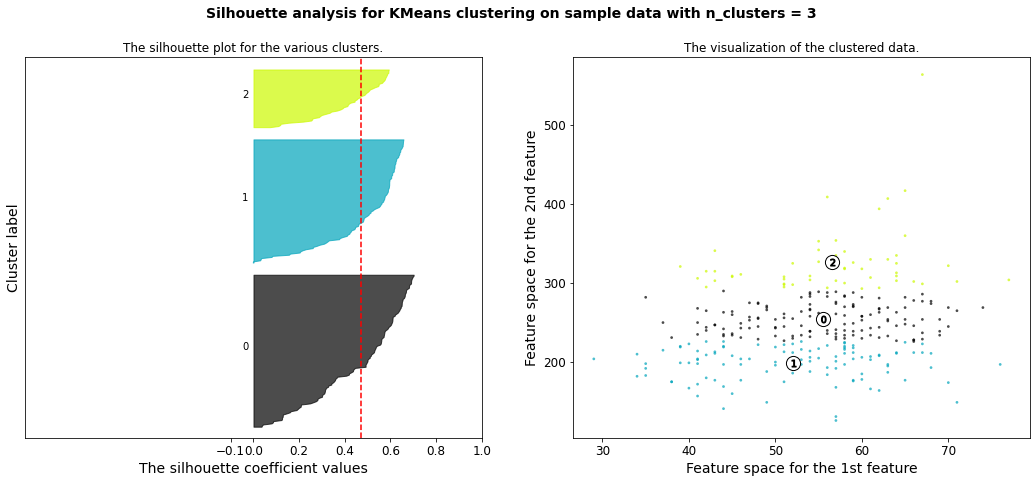

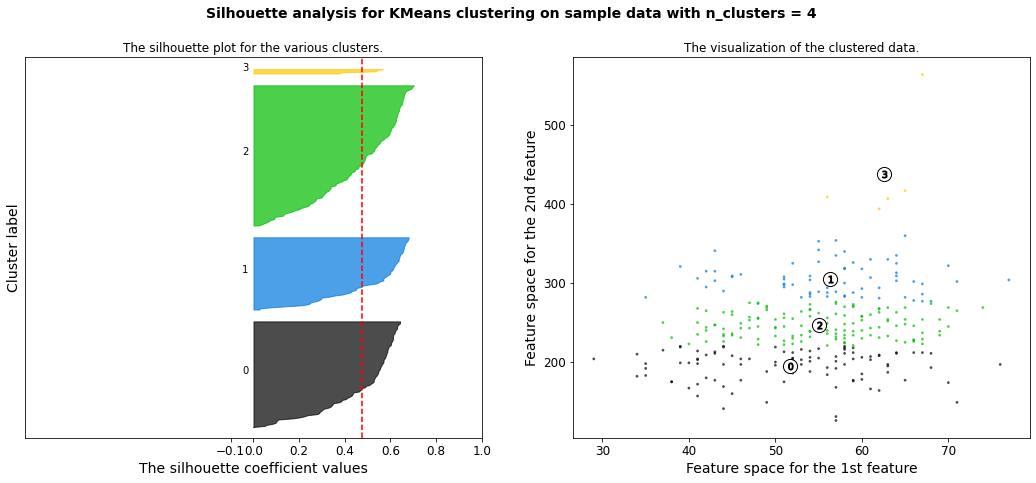

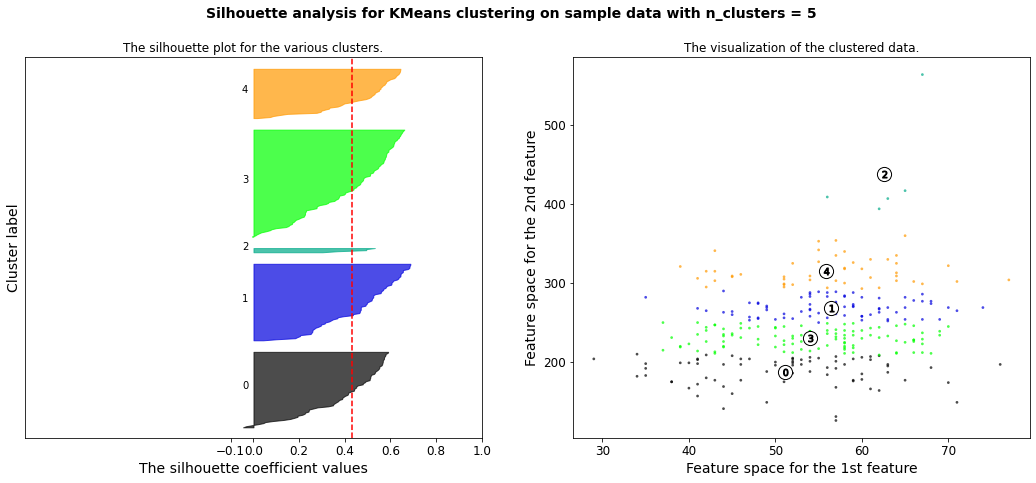

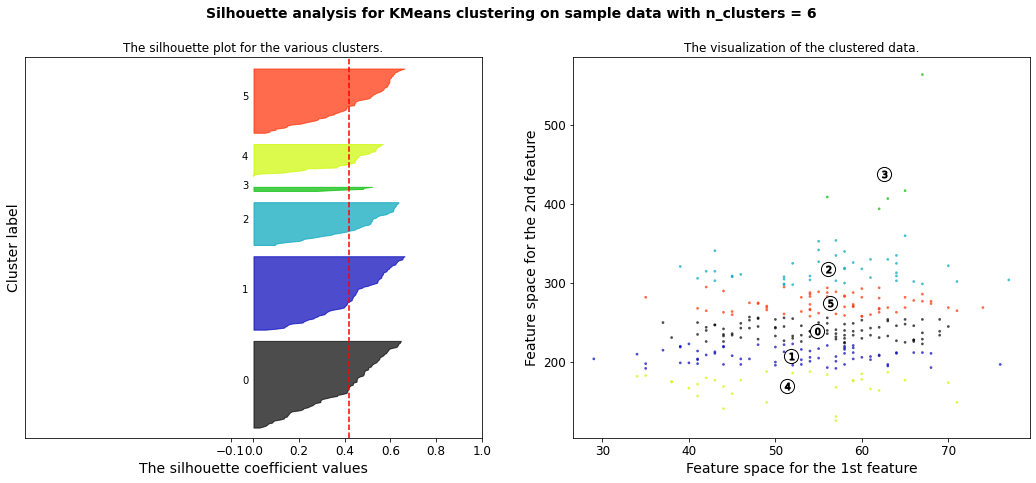

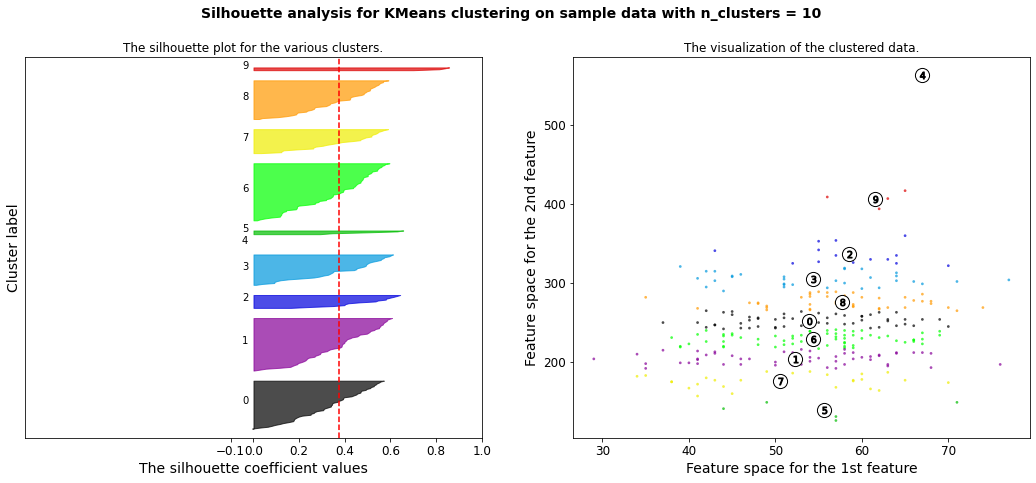

In [5]:
range_n_clusters = [2, 3, 4, 5, 6, 10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

From the Silhouette Plot, we obtain that the most optimal K value is at K = 2

In [6]:
K = 2

## __Decision Boundaries__

In [7]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=8, linewidths=10,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

In [8]:
def plot_decision_boundaries_figs(kmeans_array):
    global X, k
    n_kmeans = len(kmeans_array)
    for i in range(n_kmeans):
        print('Decision Bounds for K =', K+i)
        plot_decision_boundaries(kmeans_array[i], X)
        plt.show()
    

### __Fit and Predict__

In [9]:
def fit_pred(n):
    global X
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit_predict(X)
    print(kmeans.cluster_centers_)
    return kmeans

In [10]:
# Obtaining a few more KMeans for diffrent K just to look at centers data. 

kmeans_arr = []
for i in range (5):
    if (i > K-1):
        print("Cluster Centers of K =", i)
        kmeans_arr.append(fit_pred(i))
        print("")

Cluster Centers of K = 2
[[ 53.09947644 215.81151832]
 [ 56.52678571 298.19642857]]

Cluster Centers of K = 3
[[ 51.9009009  197.72072072]
 [ 55.51798561 254.37410072]
 [ 56.50943396 326.66037736]]

Cluster Centers of K = 4
[[ 51.72727273 194.60606061]
 [ 62.6        438.2       ]
 [ 55.01538462 246.80769231]
 [ 56.33333333 305.44927536]]



In [11]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans_arr[0].predict(X_new)

array([0, 0, 0, 0], dtype=int32)

In [12]:
# Predict new data just to check the above

for item in kmeans_arr:
    X_new = np.array([[50, 200],[53, 210],[58, 230],[50, 330]])
    print(item.predict(X_new))

[0 0 0 1]
[0 0 1 2]
[0 0 2 3]


### __Plot decision boundaries based on the Fitted KMeans__

Decision Bounds for K = 2


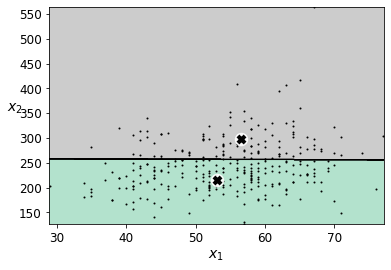

Decision Bounds for K = 3


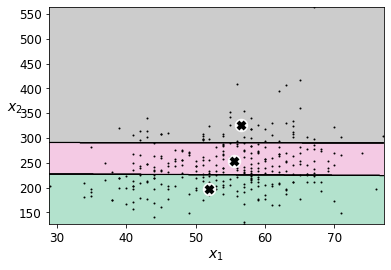

Decision Bounds for K = 4


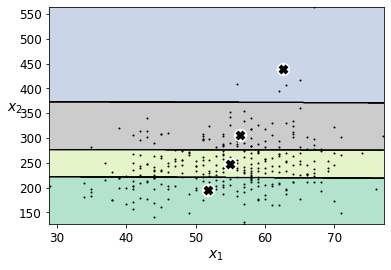

In [13]:
plot_decision_boundaries_figs(kmeans_arr)

When K = 4, it seemed that the 4th boundary have very little scatter. Hence, K = 2 is used. 

## __K-Means Algorithm__

In [14]:
def kmeans_algo(X, n):
    kmeans_iter = []
    for i in range(n):
        kmeans_iter.append(KMeans(n_clusters=K, init="random", n_init=1,
        algorithm = "full", max_iter = i+1, random_state = 1))
        kmeans_iter[i].fit(X)

    for i in range(n):
        plt.figure(figsize=(12, 4))
        if (i == 0):
            plt.subplot(121)
            plot_data(X)
            plot_centroids(kmeans_iter[i].cluster_centers_, circle_color='r', cross_color='w')
            plt.ylabel("$x_2$", fontsize=14, rotation=0)
            plt.tick_params(labelbottom=False)
            plt.title("Update the centroids (initially randomly)", fontsize=14)

            plt.subplot(122)
            plot_decision_boundaries(kmeans_iter[i], X, show_xlabels=False, show_ylabels=False)
            plt.title("Label the instances", fontsize=14)
        else:
            plt.subplot(121)
            plot_decision_boundaries(kmeans_iter[i-1], X, show_centroids=False, show_xlabels=False)
            plot_centroids(kmeans_iter[i].cluster_centers_)

            plt.subplot(122)
            plot_decision_boundaries(kmeans_iter[i], X, show_xlabels=False, show_ylabels=False)
                
    plt.show()
    

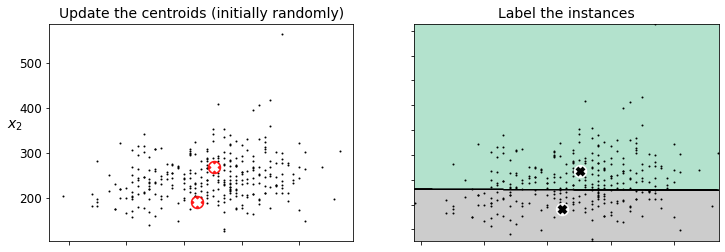

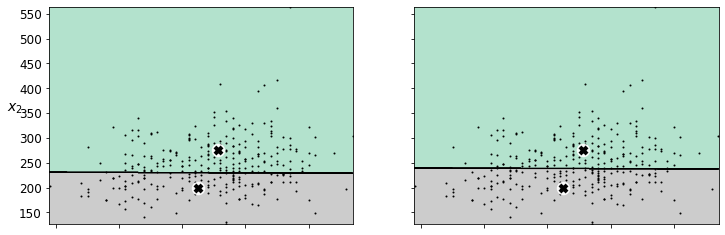

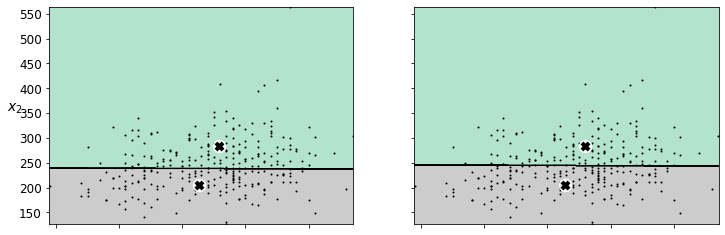

In [15]:
kmeans_algo(X, 3)

## __Gausion Mixture Models (GM)__

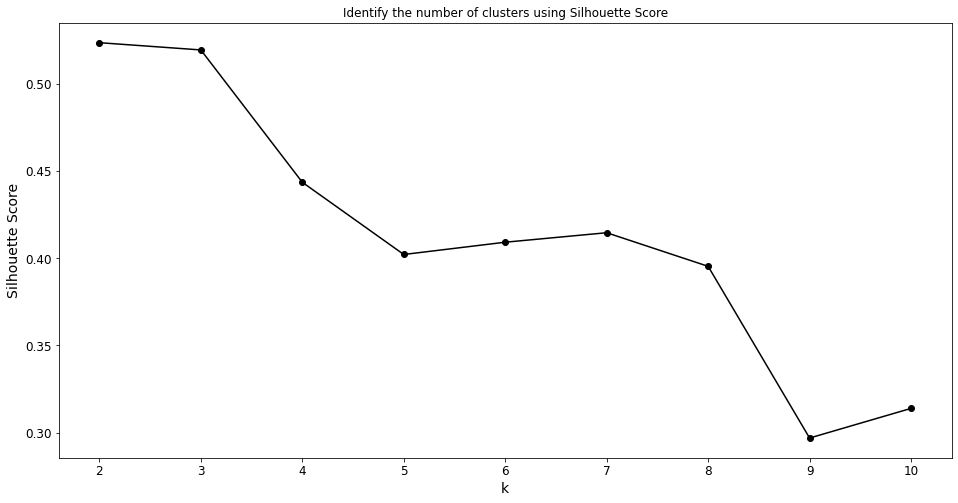

In [16]:
# Create empty list
S=[]

# Range of clusters to try (2 to 10)
R=range(2,11)

for i in R:
    # Set the model and its parameters
    model = GaussianMixture(n_components=i, n_init=20, init_params='kmeans')
    # Fit the model 
    labels = model.fit_predict(X)
    # Calculate Silhoutte Score and append to a list
    S.append(metrics.silhouette_score(X, labels, metric='euclidean'))

# Plot the resulting Silhouette scores on a graph
plt.figure(figsize=(16,8))
plt.plot(R, S, 'bo-', color='black')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Identify the number of clusters using Silhouette Score')
plt.show()

Even with GMM, we choose K=2

/var/folders/gg/nyy02mv176d4bmg5__wp49y40000gn/T/ipykernel_43312/1350173451.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame['cluster'] = labels


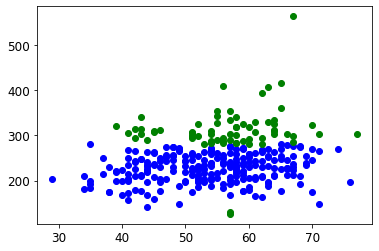

In [17]:
gmm = GaussianMixture(n_components=2)
gmm.fit(X_df)

#predictions from gmm
labels = gmm.predict(X_df)
frame = X_df
frame['cluster'] = labels

color=['blue','green']
for k in range(0,2):
    data = frame[frame["cluster"]==k]
    plt.scatter(data["age"],data["chol"],c=color[k])
plt.show()

## __Gaussian Mixture Model + KMeans__

/var/folders/gg/nyy02mv176d4bmg5__wp49y40000gn/T/ipykernel_43312/2440034785.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame1['cluster'] = y_gm
/var/folders/gg/nyy02mv176d4bmg5__wp49y40000gn/T/ipykernel_43312/2440034785.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame2['cluster2'] = y_gm_kmeans
/var/folders/gg/nyy02mv176d4bmg5__wp49y40000gn/T/ipykernel_43312/2440034785.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

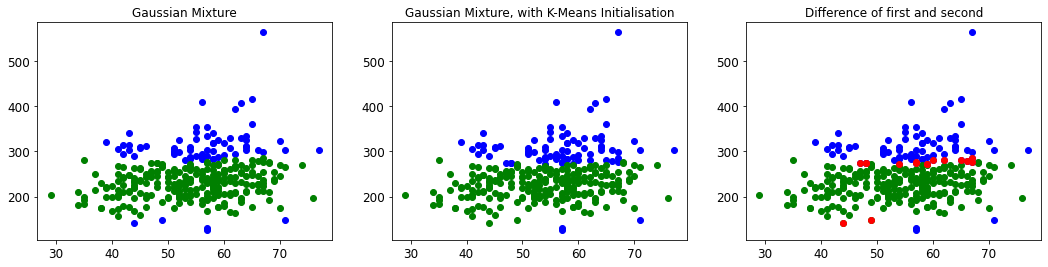

In [25]:
gm = GaussianMixture(n_components=2, 
                    #  max_iter=1000, 
                    #  tol=1e-4,
                     init_params='random')
gm_kmeans = GaussianMixture(n_components=2, 
                            # max_iter=1000, 
                            # tol=1e-4,
                            init_params='kmeans')

y_gm = gm.fit_predict(X_df.iloc[:, :2])
y_gm_proba = gm.predict_proba(X_df.iloc[:, :2])
frame1 = X_df
frame1['cluster'] = y_gm


y_gm_kmeans = gm_kmeans.fit_predict(X_df.iloc[:, :2])
y_gm_proba_kmeans = gm_kmeans.predict_proba(X_df.iloc[:, :2])
frame2 = X_df
frame2['cluster2'] = y_gm_kmeans

tempframe = X_df
tempframe['cluster3'] = (frame1['cluster'] != frame2['cluster2']).astype(int)

# Setup for side-by-side plots
f = plt.figure(figsize=(18,4))
ax1 = f.add_subplot(131)
ax2 = f.add_subplot(132)
ax3 = f.add_subplot(133)

# Plot for Gm
color=['blue','green']
for k in range(0,2):
    data1 = frame1[frame1["cluster"]==k]
    ax1.scatter(data1["age"],data1["chol"],c=color[k])
ax1.title.set_text('Gaussian Mixture')

# Plot for Gm + Kmeans
color=['blue','green']
for k in range(0,2):
    data2 = frame2[frame2["cluster2"]==k]
    ax2.scatter(data2["age"],data2["chol"],c=color[k])
ax2.title.set_text('Gaussian Mixture, with K-Means Initialisation')

# Plot for Gm + Kmeans
color=['blue','green']
for k in range(0,2):
    data2 = frame2[frame2["cluster2"]==k]
    ax3.scatter(data2["age"],data2["chol"],c=color[k])
tempdata = tempframe[tempframe['cluster3']==1]
ax3.scatter(tempdata["age"],tempdata["chol"],c='red')
ax3.title.set_text('Difference of first and second')

## __Computation time between KMeans and GM__

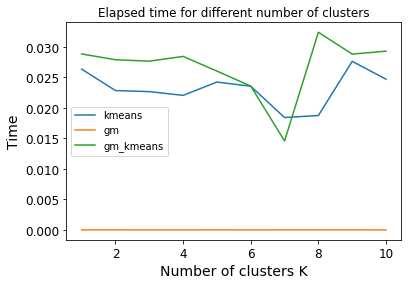

In [30]:
# Measuring Computation Time
data_new = X
# Dictionary to gather the results
elapsed_time = {
    "k": [],
    "gm": [] ,
    "gm_kmeans": [],
    "kmeans": [] 
}

# Measure time for different number of clusters
for i in range(1, 11):
  kmeans = KMeans(n_clusters=3, 
                max_iter=1000,
                tol=1e-4)
  gm = GaussianMixture(n_components=3, 
                     max_iter=1000, 
                     tol=1e-4,
                     init_params='random')
  gm_kmeans = GaussianMixture(n_components=3, 
                            max_iter=1000, 
                            tol=1e-4,
                            init_params='kmeans')
  
  start_kmeans = time.time()
  kmeans.fit_predict(data_new)
  stop_kmeans = time.time()

  gm.fit_predict(data_new)
  start_gm = time.time()
  stop_gm = time.time()
  
  start_gm_kmeans = time.time()
  gm_kmeans.fit_predict(data_new)
  stop_gm_kmeans = time.time()

  elapsed_time["k"].append(i)
  elapsed_time["kmeans"].append(stop_kmeans-start_kmeans)
  elapsed_time["gm"].append(stop_gm-start_gm)
  elapsed_time["gm_kmeans"].append(stop_gm_kmeans-start_gm_kmeans)

# Plotting the results from the dictionary
plt.plot(elapsed_time["k"], elapsed_time["kmeans"], label="kmeans")
plt.plot(elapsed_time["k"], elapsed_time["gm"], label="gm")
plt.plot(elapsed_time["k"], elapsed_time["gm_kmeans"], label="gm_kmeans")
plt.legend()
plt.title("Elapsed time for different number of clusters")
plt.xlabel("Number of clusters K")
plt.ylabel("Time")
plt.show()

Comparing the performance in terms of computing time for K means, GM, and GM with kmeans initialiser, it can b concluded that, at K = 2, it is quicker to just use Kmeans and a clustering method. 